In [1]:
import numpy as np
import torch

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{amssymb}"

In [2]:
def plot_experiments(data, algos, title, best_value, ylim=None):
    num_iterations = 100
    t = torch.linspace(0, num_iterations, num_iterations + 1)

    b = 2
    for i, algo in enumerate(algos):
        label = algos[algo][0]
        color = algos[algo][1]

        utility = torch.log(best_value - data["all_set_utilities"][algo])
        mean_utility = utility.mean(dim=0)[: num_iterations + 1]
        std_utility = utility.std(dim=0)[: num_iterations + 1]
        plt.plot(t, mean_utility, label=label, linewidth=4, color=color)
        plt.fill_between(
            t,
            mean_utility + b * std_utility,
            mean_utility - b * std_utility,
            alpha=0.15,
            color=color,
            edgecolor="white",
            linewidth=1.5,
        )
    if ylim is not None:
        plt.ylim(ylim)
    plt.xlim(0, num_iterations)
    plt.xticks(np.linspace(0, num_iterations, 11), fontsize=20)
    plt.yticks(fontsize=20)

    plt.title(title, fontsize=30)
    plt.grid(alpha=0.5)
    return None

In [3]:
rocket_data = torch.load("data/rocket_hv_data.pt")
vehicle_data = torch.load("data/vehicle_hv_data.pt")
marine_data = torch.load("data/marine_hv_data.pt")
carside_data = torch.load("data/carside_hv_data.pt")

# Varying J

In [4]:
colors = pl.cm.viridis(np.linspace(0, 1, 10))

algos = {
    "sobol": ["Sobol", "black"],
    "eui-mc-1": ["EUI-1", colors[0]],
    "eui-mc-2": ["EUI-2", colors[1]],
    "eui-mc-4": ["EUI-4", colors[2]],
    "eui-mc-8": ["EUI-8", colors[3]],
    "eui-mc-16": ["EUI-16", colors[4]],
    "eui-mc-32": ["EUI-32", colors[5]],
    "eui-mc-64": ["EUI-64", colors[6]],
    "eui-mc-128": ["EUI-128", colors[7]],
    "eui-mc-256": ["EUI-256", colors[8]],
    "nehvi": ["EUI", colors[9]],
}

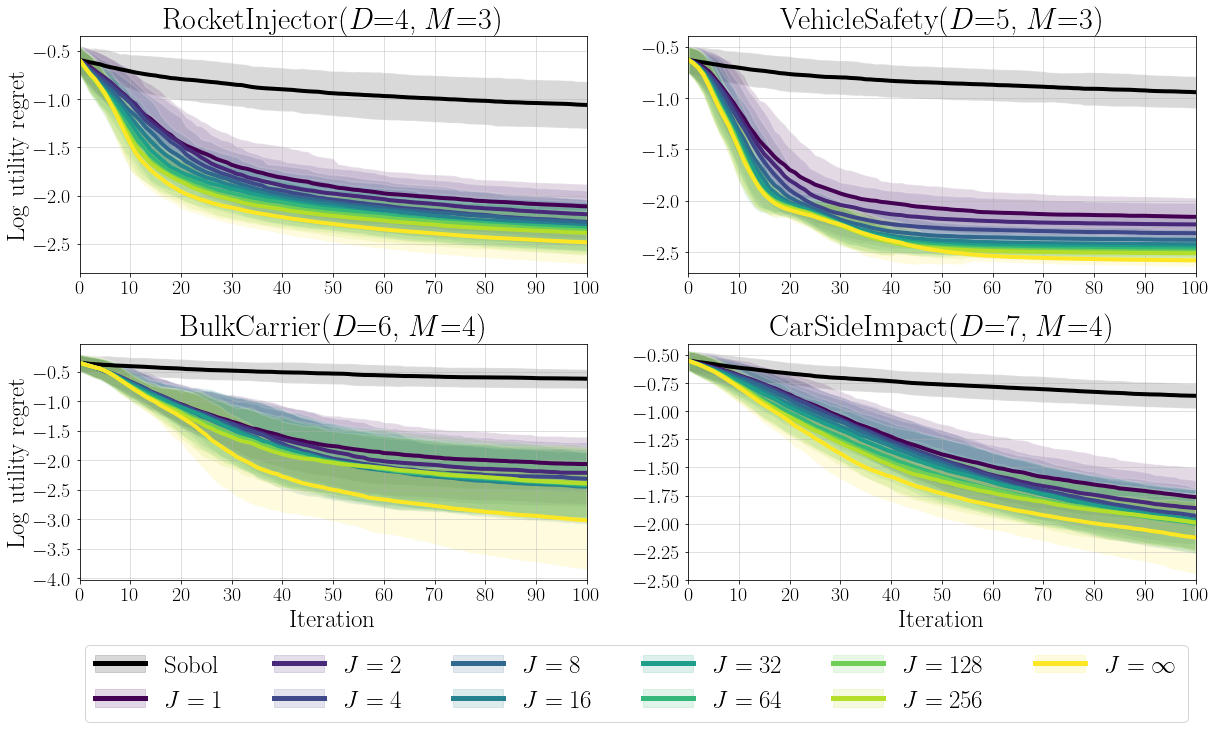

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
plt.subplots_adjust(
    left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3
)

#######################################################
plt.subplot(2, 2, 1)
plot_experiments(
    data=rocket_data,
    algos=algos,
    title=r"RocketInjector($D$=4, $M$=3)",
    best_value=1,
    ylim=[-2.8, -0.35],
)

plt.ylabel("Log utility regret", fontsize=25)
#######################################################
plt.subplot(2, 2, 2)
plot_experiments(
    data=vehicle_data,
    algos=algos,
    title=r"VehicleSafety($D$=5, $M$=3)",
    best_value=0.95,
    ylim=[-2.7, -0.4],
)
#######################################################
plt.subplot(2, 2, 3)
plot_experiments(
    data=marine_data, algos=algos, title=r"BulkCarrier($D$=6, $M$=4)", best_value=1.2
)
plt.ylabel("Log utility regret", fontsize=25)
plt.xlabel("Iteration", fontsize=25)
#######################################################
plt.subplot(2, 2, 4)
plot_experiments(
    data=carside_data,
    algos=algos,
    title=r"CarSideImpact($D$=7, $M$=4)",
    best_value=1.1,
    ylim=[-2.5, -0.4],
)
plt.xlabel("Iteration", fontsize=25)

#######################################################
black_line = mlines.Line2D([], [], color="black", linestyle="-", linewidth=5)
black_patch = mpatches.Patch(color="black", alpha=0.15)
handles = [(black_line, black_patch)]

for c in colors:
    handles += [
        (
            mlines.Line2D([], [], color=c, linestyle="-", linewidth=5),
            mpatches.Patch(color=c, alpha=0.15),
        )
    ]

labels = [
    "Sobol",
    r"$J=1$",
    r"$J=2$",
    r"$J=4$",
    r"$J=8$",
    r"$J=16$",
    r"$J=32$",
    r"$J=64$",
    r"$J=128$",
    r"$J=256$",
    r"$J=\infty$",
]

axes[1, 0].legend(handles=handles, labels=labels, loc=(0.01, -0.6), ncol=6, fontsize=25)
#######################################################

plt.show()

# Varying T

In [6]:
colors = pl.cm.viridis(np.linspace(0, 1, 9))

algos = {
    "sobol": ["Sobol", "black"],
    "eui-fs-1": ["EUI-1", colors[0]],
    "eui-fs-2": ["EUI-2", colors[1]],
    "eui-fs-4": ["EUI-4", colors[2]],
    "eui-fs-8": ["EUI-8", colors[3]],
    "eui-fs-16": ["EUI-16", colors[4]],
    "eui-fs-32": ["EUI-32", colors[5]],
    "eui-fs-64": ["EUI-64", colors[6]],
    "eui-fs-128": ["EUI-128", colors[7]],
    "eui-fs-256": ["EUI-256", colors[8]],
}

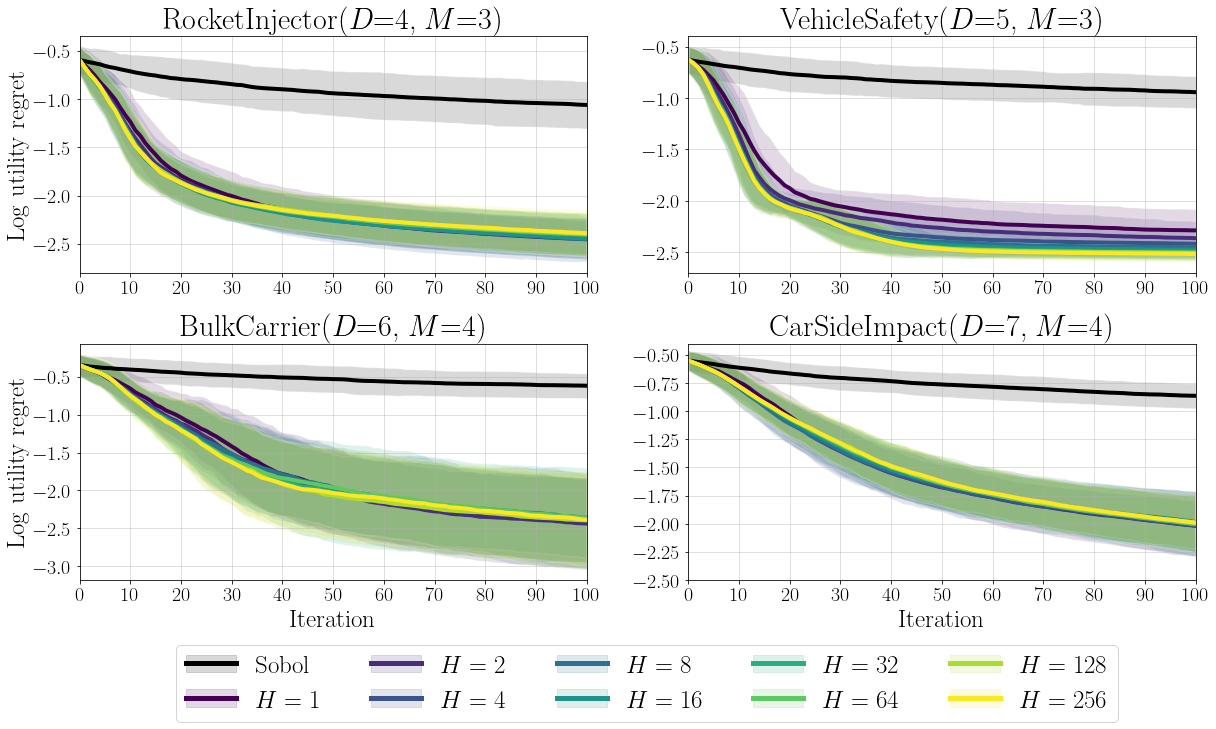

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
plt.subplots_adjust(
    left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3
)

#######################################################
plt.subplot(2, 2, 1)
plot_experiments(
    data=rocket_data,
    algos=algos,
    title=r"RocketInjector($D$=4, $M$=3)",
    best_value=1,
    ylim=[-2.8, -0.35],
)

plt.ylabel("Log utility regret", fontsize=25)
#######################################################
plt.subplot(2, 2, 2)
plot_experiments(
    data=vehicle_data,
    algos=algos,
    title=r"VehicleSafety($D$=5, $M$=3)",
    best_value=0.95,
    ylim=[-2.7, -0.4],
)
#######################################################
plt.subplot(2, 2, 3)
plot_experiments(
    data=marine_data, algos=algos, title=r"BulkCarrier($D$=6, $M$=4)", best_value=1.2
)
plt.ylabel("Log utility regret", fontsize=25)
plt.xlabel("Iteration", fontsize=25)
#######################################################
plt.subplot(2, 2, 4)
plot_experiments(
    data=carside_data,
    algos=algos,
    title=r"CarSideImpact($D$=7, $M$=4)",
    best_value=1.1,
    ylim=[-2.5, -0.4],
)
plt.xlabel("Iteration", fontsize=25)

#######################################################
black_line = mlines.Line2D([], [], color="black", linestyle="-", linewidth=5)
black_patch = mpatches.Patch(color="black", alpha=0.15)
handles = [(black_line, black_patch)]

for c in colors:
    handles += [
        (
            mlines.Line2D([], [], color=c, linestyle="-", linewidth=5),
            mpatches.Patch(color=c, alpha=0.15),
        )
    ]

labels = [
    "Sobol",
    r"$H=1$",
    r"$H=2$",
    r"$H=4$",
    r"$H=8$",
    r"$H=16$",
    r"$H=32$",
    r"$H=64$",
    r"$H=128$",
    r"$H=256$",
]

axes[1, 0].legend(handles=handles, labels=labels, loc=(0.19, -0.6), ncol=5, fontsize=25)
#######################################################

plt.show()

# Varying sigma

In [8]:
colors = pl.cm.viridis(np.linspace(0, 1, 9))

algos = {
    "sobol": ["Sobol", "black"],
    "eui-std-0": [r"Noise=0\%", colors[0]],
    "eui-std-0.01": [r"Noise=1\%", colors[1]],
    "eui-std-0.025": [r"Noise=2.5\%", colors[2]],
    "eui-std-0.05": [r"Noise=5\%", colors[3]],
    "eui-std-0.1": [r"Noise=10\%", colors[4]],
    "eui-std-0.15": [r"Noise=15\%", colors[5]],
    "eui-std-0.2": [r"Noise=20\%", colors[6]],
    "eui-std-0.25": [r"Noise=25\%", colors[7]],
    "eui-std-0.3": [r"Noise=30\%", colors[8]],
}

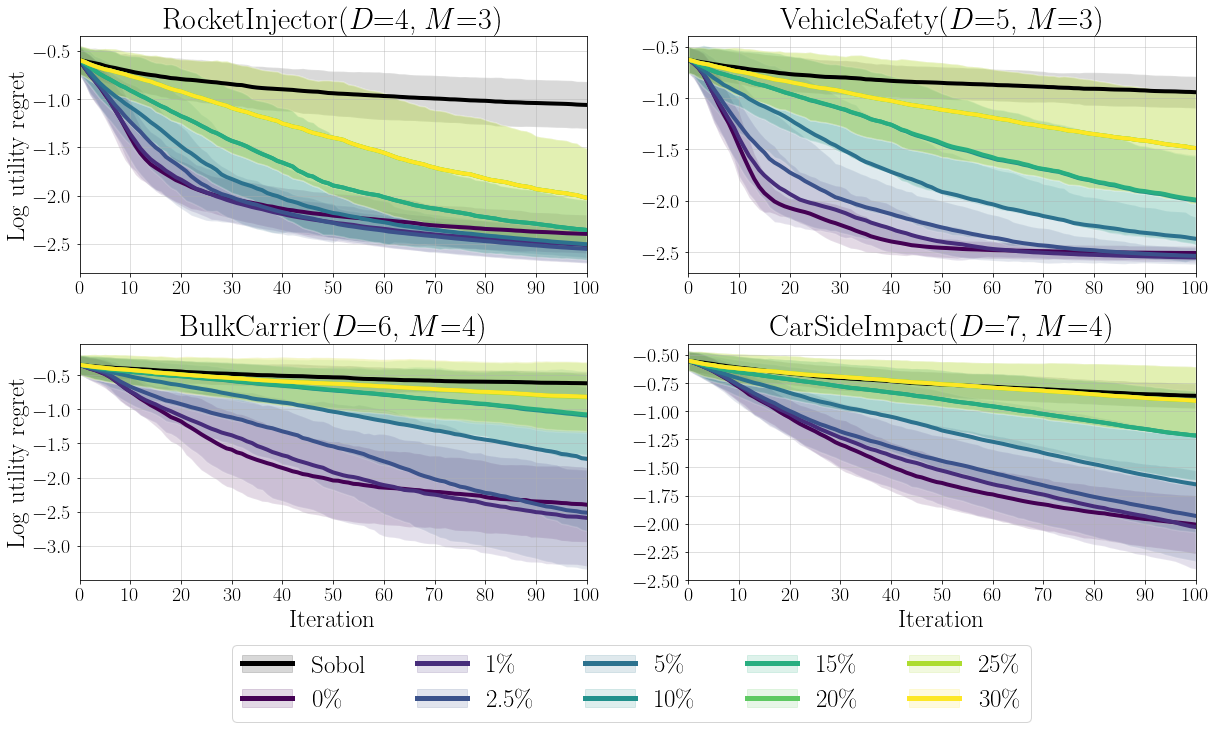

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
plt.subplots_adjust(
    left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3
)

#######################################################
plt.subplot(2, 2, 1)
plot_experiments(
    data=rocket_data,
    algos=algos,
    title=r"RocketInjector($D$=4, $M$=3)",
    best_value=1,
    ylim=[-2.8, -0.35],
)

plt.ylabel("Log utility regret", fontsize=25)
#######################################################
plt.subplot(2, 2, 2)
plot_experiments(
    data=vehicle_data,
    algos=algos,
    title=r"VehicleSafety($D$=5, $M$=3)",
    best_value=0.95,
    ylim=[-2.7, -0.4],
)
#######################################################
plt.subplot(2, 2, 3)
plot_experiments(
    data=marine_data, algos=algos, title=r"BulkCarrier($D$=6, $M$=4)", best_value=1.2
)
plt.ylabel("Log utility regret", fontsize=25)
plt.xlabel("Iteration", fontsize=25)
#######################################################
plt.subplot(2, 2, 4)
plot_experiments(
    data=carside_data,
    algos=algos,
    title=r"CarSideImpact($D$=7, $M$=4)",
    best_value=1.1,
    ylim=[-2.5, -0.4],
)
plt.xlabel("Iteration", fontsize=25)

#######################################################
black_line = mlines.Line2D([], [], color="black", linestyle="-", linewidth=5)
black_patch = mpatches.Patch(color="black", alpha=0.15)
handles = [(black_line, black_patch)]

for c in colors:
    handles += [
        (
            mlines.Line2D([], [], color=c, linestyle="-", linewidth=5),
            mpatches.Patch(color=c, alpha=0.15),
        )
    ]

labels = [
    "Sobol",
    r"0\%",
    r"1\%",
    r"2.5\%",
    r"5\%",
    r"10\%",
    r"15\%",
    r"20\%",
    r"25\%",
    r"30\%",
]

axes[1, 0].legend(handles=handles, labels=labels, loc=(0.3, -0.6), ncol=5, fontsize=25)
#######################################################

plt.show()